# Final Project
## Text Summarizer With Lstm Attention Mechanism

#### Group 3:


| Alluri Ratna Anvesh  | Ashish Rogannagari   |
|----------------------|----------------------|
| **Deepak Reddy Guda**| **Nikki Rastogi**    |


## Introduction:
**Text summarization** generates concise summaries from lengthy text while retaining key information. Unlike extractive models like TextRank, abstractive summarization creates new sentences, offering more fluent and human-like summaries. Our project basically focuses on building an **Abstractive text summarizer** for the Amazon Fine Foods reviews dataset using a Long Short-Term Memory (LSTM) model combined with an Attention Mechanism.

**Abstractive Summarization:** Abstract Summarization focuses on the vital information of the original group of sentences and generates a new set of sentences for the summary. This new sentence might not be present in the original sentence. This is the opposite of Extractive summarization where it takes an exact sentence to generate a summary.

- We use a Long Short-Term Memory (LSTM) model with an Attention Mechanism to dynamically focus on relevant parts of the text and Generate coherent summaries efficiently.


##### Problem Statement:

- Companies like Amazon receive millions of customer reviews daily, making manual analysis impractical. Identifying trends, sentiments, and insights from this vast amount of feedback is challenging.

- Businesses struggle to efficiently process and understand customer opinions at scale. There is a need to extract meaningful insights quickly and accurately from large volumes of review data. Understanding customer sentiments and feedback is crucial for informed decision-making.

- Our project aims to generate concise, human-like summaries of Amazon Fine Foods reviews using an LSTM model with an Attention Mechanism and also classify customer reviews as positive, neutral, or negative to enhance business understanding.

##### Who will take benefit from this :
- Business Analysts: Quickly identify trends and actionable insights from large volumes of customer feedback to support data-driven decisions.

-
Product Managers: Understand product performance and customer sentiment to guide product development and improvements

-
Executives and Decision-Makers: Leverage summarized insights and sentiment classifications to make strategic business decisions efficiently.



##### Data Source:
Initially we downloaded the datasource from https://snap.stanford.edu/data/web-FineFoods.html . The file which we downloaded was a extracted text document, which was not properly structured. So, then we have converted the text document into a csv file and uploaded it into the git.
(Code is below)
- Git Link: https://media.githubusercontent.com/media/nikkirastogi/Summerizer_Amazon_Food_Reviews/refs/heads/main/amazon_food_reviews_output.csv

##### Now that we have converted the file into csv and saved it to our local drive. Next step, Since the file is over 100 MB, we have uploaded the file into git by using Git Large File Storage (Git Lfs) method.¶

### Uploading the Csv File into Git.

- git lfs install (to upload large file once instal lfs)
- git status
- git lfs track "*.csv"
- git add.
- git commit -m "upload csv output file"
- git push origin main
- Then enter your username and Password (Token Number)


This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews.
- Number of reviews: 568,454
- Number of users: 256,059
- Number of products: 74,258      
- Memory: 377 MB

## Research Questions:
The primary goal of our project is to Generate concise summaries of Amazon Fine Foods reviews using machine learning techniques. Key questions include:
1. **Can we accurately classify customer reviews as positive, neutral, or negative?**

2. **Can we generate concise summaries of reviews using sequence models?**
   
3. **How does an LSTM with Attention Mechanism perform in terms of efficiency and accuracy?**



The proposed research question focuses on the development and evaluation of an LSTM with Attention Mechanism for text summarization of Amazon Fine Foods reviews.

##### Why LSTM with Attention Mechanism?:

- Handles sequential data and long-term dependencies.
- Attention mechanism ensures focus on the most relevant parts of the input.
- Resource-efficient compared to transformer models like BART or PEGASUS, suitable for moderate-scale applications.

### Approach:
1. Data Extraction
2. Data Preparation
3. Exploratory Data Analysis
4. Data Preprocessing
5. Model Building
   - For Classification
        - Naive Bayes
        - XGBoost
   - For Summerizer
        - LSTM With Attention Mechanism
            - Encoder
            - Decoder
            - Attention
7. Model Selection

#### Installing necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from gensim.utils import simple_preprocess  # For text tokenization and preprocessing
from textblob import TextBlob               # For sentiment analysis
from collections import Counter             # For counting occurrences of elements
from wordcloud import WordCloud             # For generating word clouds

from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text to TF-IDF features
from sklearn.model_selection import train_test_split         # For splitting datasets into train and test sets
from sklearn.naive_bayes import MultinomialNB               # For Naive Bayes text classification
from sklearn.metrics import classification_report           # For generating classification performance metrics
from sklearn.preprocessing import LabelEncoder              # For encoding categorical labels

from xgboost import XGBClassifier                           # For XGBoost classification
from statistics import mode                                 # For calculating the mode of a dataset

from tensorflow.keras.preprocessing.text import Tokenizer    # For tokenizing text data
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences to the same length
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Attention, Concatenate  # Keras model layers
from tensorflow.keras.models import Model, load_model        # For creating and loading Keras models
from tensorflow.keras.utils import plot_model                # For visualizing model architecture



# 1. Data Extraction:
### Loading the Dataset
- The dataset consists of Amazon Fine Food reviews sourced from the provided GitHub link.
- The data is loaded using pandas into a DataFrame.
- Initial inspection of the dataset is performed using .head() to display the first five rows.

In [2]:
# Loading the dataset
url = "https://media.githubusercontent.com/media/nikkirastogi/Summerizer_Amazon_Food_Reviews/refs/heads/main/amazon_food_reviews_output.csv"
df = pd.read_csv(url)

# Displaying the first few rows
df.head()


product/productId   review/userId               review/profileName  \
0        B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1        B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2        B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3        B000UA0QIQ  A395BORC6FGVXV                             Karl   
4        B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

  review/helpfulness  review/score  review/time         review/summary  \
0                1/1           5.0   1303862400  Good Quality Dog Food   
1                0/0           1.0   1346976000      Not as Advertised   
2                1/1           4.0   1219017600  "Delight" says it all   
3                3/3           2.0   1307923200         Cough Medicine   
4                0/0           5.0   1350777600            Great taffy   

                                         review/text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

### Renaming Columns
- To improve readability and usability, the columns in the dataset are renamed:
  - product_id: Identifier for the product.
  - user_id: Identifier for the user who left the review.
  - profile_name: Name of the user profile.
  - helpfulness: Helpfulness score of the review.
  - score: Rating given by the user.
  - review_time: Timestamp of the review.
  - Summary: Summary of the review.
  - Text: Full text of the review.
- This step enhances clarity for subsequent analysis.
- The .head() method confirms the column renaming by displaying the first five rows.

In [3]:
# Renaming columns for better readability
df.columns = [
    'product_id', 'user_id', 'profile_name', 'helpfulness',
    'score', 'review_time', 'Summary', 'Text'
]

# Displaying the first few rows
df.head()

product_id         user_id                     profile_name helpfulness  \
0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian         1/1   
1  B00813GRG4  A1D87F6ZCVE5NK                           dll pa         0/0   
2  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"         1/1   
3  B000UA0QIQ  A395BORC6FGVXV                             Karl         3/3   
4  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"         0/0   

   score  review_time                Summary  \
0    5.0   1303862400  Good Quality Dog Food   
1    1.0   1346976000      Not as Advertised   
2    4.0   1219017600  "Delight" says it all   
3    2.0   1307923200         Cough Medicine   
4    5.0   1350777600            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

### Function: Expand Contractions
- *Purpose*: Replaces contractions in text (e.g., "can't" → "cannot") using a predefined dictionary.
- *Input*:
  - text: The input text string.
  - contractions: A dictionary mapping contractions to their expanded forms.
- *Output*: The text with all contractions expanded for better readability and preprocessing.

### Data Dictionary

| Column Name      | Description                                                                                  |
|-------------------|----------------------------------------------------------------------------------------------|
| `product_id`      | Unique identifier for the product.                                                          |
| `user_id`         | Unique identifier for the user who left the review.                                         |
| `profile_name`    | Name of the reviewer.                                                                       |
| `helpfulness`     | Helpfulness score of the review, represented as a fraction (e.g., `votes/helpful votes`).   |
| `score`           | The rating given by the user (typically out of 5).                                          |
| `review_time`     | Timestamp of when the review was posted, represented in Unix epoch time format.             |
| `Summary`         | A short summary of the review.                                                              |
| `Text`            | The full text of the review.                                                                |

# 2. Data Preparation

### 2.1. Text Cleaning:
We have used contraction mapping to clean the data.

#### Contraction Mapping:
- Creating a dictionary to expand common contractions (e.g., "can't" → "cannot").
- gensim.utils.simple_preprocess: This function is a utility from the Gensim library that tokenizes text into a list of lowercase words and removes punctuation.
- Converts all text to lowercase.
- Removes special characters, leaving only alphanumeric content and spaces.
- Strips away any embedded HTML tags.

In [4]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}


In [5]:
def expand_contractions(text, contractions):
    """Expand contractions in a given text."""
    return ' '.join([contractions[word] if word in contractions else word for word in text.split()])


Here,the preprocess_for_eda function is designed to prepare text data for exploratory data analysis (EDA) by:
- Expanding contractions to improve readability.
- Tokenizing the text to break it down into individual words.
- Cleaning the text by removing punctuation and converting to lowercase.
- Filtering out short words that might not be informative.

### Function: Preprocess for EDA
- *Purpose*: Prepares text data for exploratory data analysis (EDA) by:
  1. Expanding contractions using expand_contractions.
  2. Tokenizing the text, removing punctuation, and filtering short words.
- *Input*:
  - text: A string or list of strings to preprocess.
- *Output*: A cleaned and tokenized string ready for analysis.

In [6]:
def preprocess_for_eda(text):
    """Expand contractions, tokenize, and preprocess text for EDA."""
    # Ensure the input is a string
    if isinstance(text, list):
        text = ' '.join(text)

    # Step 1: Expand contractions
    text = expand_contractions(text, contraction_mapping)

    # Step 2: Tokenize and preprocess text (lowercase, remove punctuation, exclude short words)
    words = simple_preprocess(text, deacc=True, min_len=2)

    return ' '.join(words)


### Preprocessing Text and Summary Columns
- *Purpose*: Ensures Text and Summary columns are clean and consistent for analysis.
- *Steps*:
  1. *Handle Missing Values*: Replace NaN with an empty string.
  2. *Apply Preprocessing*: Use the preprocess_for_eda function to expand contractions, tokenize, and clean the text.
- This step standardizes the dataset for subsequent tasks such as EDA and model building.

In [7]:
df['Text'] = df['Text'].fillna('').apply(preprocess_for_eda)
df['Summary'] = df['Summary'].fillna('').apply(preprocess_for_eda)

In [9]:
df

product_id         user_id                     profile_name  \
0       B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1       B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2       B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3       B000UA0QIQ  A395BORC6FGVXV                             Karl   
4       B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...            ...             ...                              ...   
568449  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

       helpfulness  score  review_time                             Summary  \
0              1/1    5.0   1303862400               good quality dog food   
1              0/0    1.0   1346976000                   not as advertised   
2              1/1    4.0   1219017600                 delight says it all   
3              3/3    2.0   1307923200                      cough medicine   
4              0/0    5.0   1350777600                         great taffy   
...            ...    ...          ...                                 ...   
568449         0/0    5.0   1299628800                 will not do without   
568450         0/0    2.0   1331251200                        disappointed   
568451         2/2    5.0   1329782400            perfect for our maltipoo   
568452         1/1    5.0   1331596800  favorite training and reward treat   
568453         0/0    5.0   1338422400                         great honey   

                                                     Text  
0       have bought several of the vitality canned dog...  
1       product arrived labeled as jumbo salted peanut...  
2       this is confection that has been around few ce...  
3       if you are looking for the secret ingredient i...  
4       great taffy at great price there was wide asso...  
...                                                   ...  
568449  great for sesame chicken this is good if not b...  
568450  am disappointed with the flavor the chocolate ...  
568451  these stars are small so you can give of those...  
568452  these are the best treats for training and rew...  
568453  am very satisfied product is as advertised use...  

[568454 rows x 8 columns]

- preprocess_text is more uniform and ready for tasks like text summarization, sentiment analysis

### 2.2.  Data Overview:

ProfileName, helpfulness, review time are dropped because these are not required for further analysis.

### Dropping Unnecessary Columns
- *Purpose*: Removes columns that are not relevant for the analysis or model building:
  - profile_name: User's profile name.
  - helpfulness: Helpfulness score of the review.
  - review_time: Timestamp of the review.
- This step reduces data noise and focuses the dataset on essential attributes.

In [10]:
# Dropping the column if it's not needed
df = df.drop(columns=['profile_name','helpfulness','review_time'])

### Checking for Missing Values
- *Purpose*: Identifies the number of missing values in each column of the dataset.
- *Output*: A summary of missing values, which helps in determining further data cleaning steps if needed.

In [11]:
df.isnull().sum()

product_id    0
user_id       0
score         0
Summary       0
Text          0
dtype: int64

In [12]:
df.shape

(568454, 5)

### Duplicate Check
- Identifies if duplicate rows exist (True or False).

In [13]:
df.duplicated().any()


True

In [14]:
df.duplicated().sum()

1029

In [15]:
# Drop all duplicate rows, keeping the first occurrence
df.drop_duplicates(inplace=True)

### Dataset Shape
- Returns the dataset's dimensions as (rows, columns)

In [16]:
df.shape

(567425, 5)

### 2.3. Label Creation:

Our data was not labeled to perform the sentiment analysis. So, we had to create the labels by using the " textblob " library which calculates the sentiment polarity.
- **TextBlob** is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

We performed the following steps:
- Calculated the sentiment polarity of each text using TextBlob.
- Mapping the polarity values to sentiment labels (positive, neutral, negative).
- Created a new column in the DataFrame to store the sentiment labels.
- Counting the occurrences of each sentiment label to understand the overall sentiment distribution.

### Sentiment Analysis
- *Sentiment Polarity*: Calculated using TextBlob to determine the polarity of each review.
- *Mapping Sentiment*:
  - Positive: Polarity > 0
  - Neutral: Polarity = 0
  - Negative: Polarity < 0
- *Output*: Distribution of sentiment labels (positive, neutral, negative) using .value_counts().

In [17]:
# Calculate sentiment polarity
df['sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

def map_sentiment(sentiment):
    if sentiment > 0:
        return "positive"
    elif sentiment == 0:
        return "neutral"
    else:
        return "negative"

df['Sentiment_Label'] = df['sentiment'].apply(map_sentiment)
print(df['Sentiment_Label'].value_counts())

Sentiment_Label
positive    501809
negative     57837
neutral       7779
Name: count, dtype: int64


- Summarizing the overall sentiment distribution in the dataset

In [18]:
df.head()

product_id         user_id  score                Summary  \
0  B001E4KFG0  A3SGXH7AUHU8GW    5.0  good quality dog food   
1  B00813GRG4  A1D87F6ZCVE5NK    1.0      not as advertised   
2  B000LQOCH0   ABXLMWJIXXAIN    4.0    delight says it all   
3  B000UA0QIQ  A395BORC6FGVXV    2.0         cough medicine   
4  B006K2ZZ7K  A1UQRSCLF8GW1T    5.0            great taffy   

                                                Text  sentiment  \
0  have bought several of the vitality canned dog...   0.450000   
1  product arrived labeled as jumbo salted peanut...  -0.033333   
2  this is confection that has been around few ce...   0.133571   
3  if you are looking for the secret ingredient i...   0.166667   
4  great taffy at great price there was wide asso...   0.483333   

  Sentiment_Label  
0        positive  
1        negative  
2        positive  
3        positive  
4        positive

- This is the final dataframe after cleaning and creating the labels.

# 3. Exploratory Data Analysis

#### 3.1 Data Summary

In [19]:
df.describe()

score      sentiment
count  567425.000000  567425.000000
mean        4.184160       0.234745
std         1.309313       0.216418
min         1.000000      -1.000000
25%         4.000000       0.104648
50%         5.000000       0.226099
75%         5.000000       0.361111
max         5.000000       1.000000

#### 3.2 Length Distribution Analysis

We performed length distribution analysis to find out the average lengths of the texts and summaries and to find out the outliers. This analysis Visualizes whether the data is skewed or normally distributed. Comparing Summary and Review Length side-by-side allows quick insights into how detailed reviews are compared to their summaries.

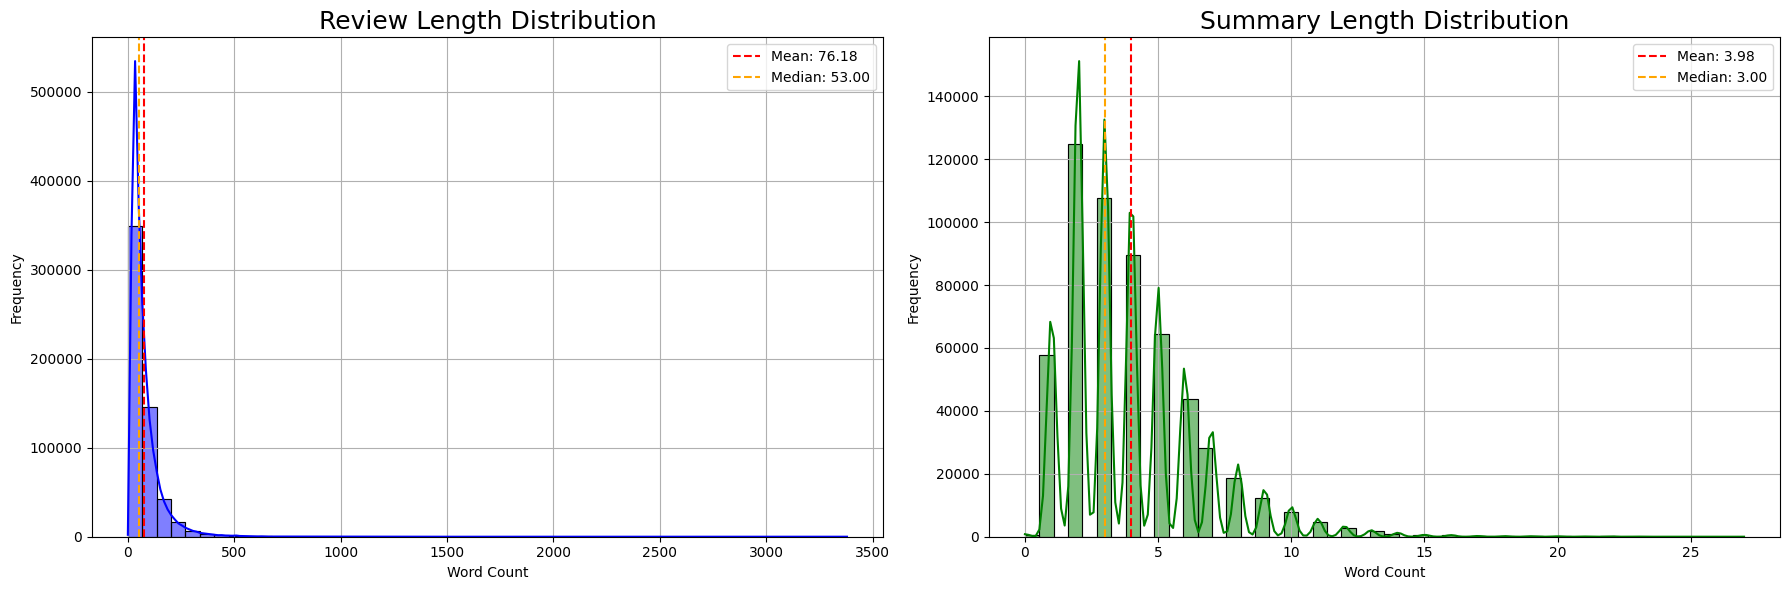

In [20]:
# Calculate review and summary lengths
df['review_length'] = df['Text'].apply(lambda x: len(x.split()))
df['summary_length'] = df['Summary'].apply(lambda x: len(x.split()))

# Calculate median and mean for review and summary lengths
review_median = np.median(df['review_length'])
review_mean = np.mean(df['review_length'])
summary_median = np.median(df['summary_length'])
summary_mean = np.mean(df['summary_length'])

# Display side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Review length distribution
sns.histplot(df['review_length'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].axvline(review_mean, color='red', linestyle='--', label=f'Mean: {review_mean:.2f}')
axes[0].axvline(review_median, color='orange', linestyle='--', label=f'Median: {review_median:.2f}')
axes[0].set_title('Review Length Distribution', fontsize=18)
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Summary length distribution
sns.histplot(df['summary_length'], bins=50, kde=True, color='green', ax=axes[1])
axes[1].axvline(summary_mean, color='red', linestyle='--', label=f'Mean: {summary_mean:.2f}')
axes[1].axvline(summary_median, color='orange', linestyle='--', label=f'Median: {summary_median:.2f}')
axes[1].set_title('Summary Length Distribution', fontsize=18)
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Observation:**
- The review length distribution is highly right-skewed, with most reviews being concise and a few outliers exceeding 1000 words.
- The average review length is approximately 76 words, while the median is 53, indicating the influence of long outliers.
- The summary length distribution is also right-skewed but less extreme, with most summaries consisting of 3–4 words on average.
- Reviews are significantly longer than summaries, highlighting the need for proper truncation and padding during preprocessing.
- Outliers in both distributions should be handled to ensure effective text preprocessing and model training.

#### 3.3 Word Cloud Visualization:

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Concatenates all reviews and summaries into two separate strings (review_text and summary_text). This creates a single string for each column, which is required to generate the word cloud.
- For Reviews: wordcloud_review visualizes the most common words in the Text column.
- For Summaries: wordcloud_summary visualizes the most common words in the Summary column.


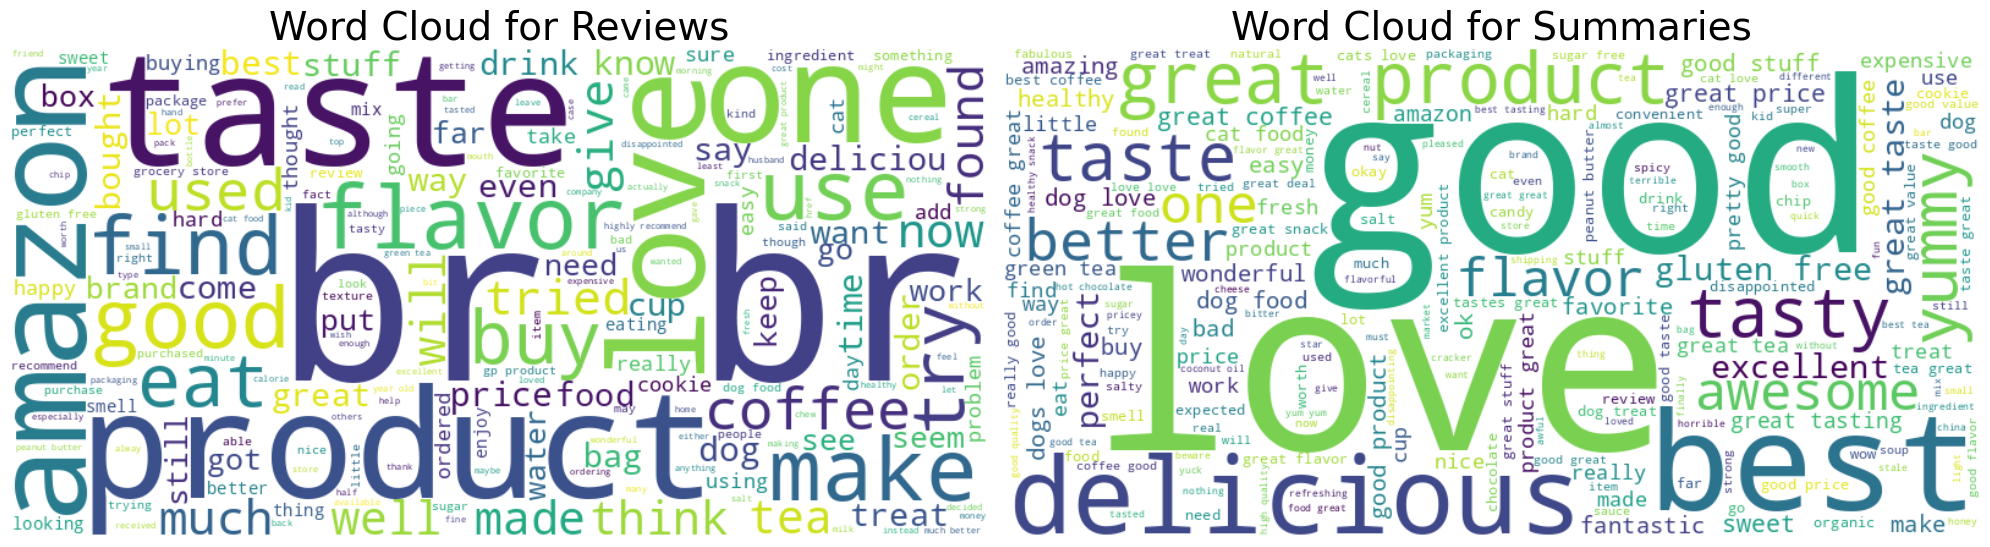

In [21]:
# Create word cloud for review text
review_text = ' '.join(df['Text'])
wordcloud_review = WordCloud(width=800, height=400, background_color='white').generate(review_text)

# Create word cloud for summary text
summary_text = ' '.join(df['Summary'])
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

# Plotting side by side
plt.figure(figsize=(20, 10))

# Plot the word cloud for reviews
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews', fontsize=28)

# Plot the word cloud for summaries
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summaries', fontsize=28)

# Show the combined plots
plt.tight_layout()
plt.show()


**Observation:**

The word clouds show that reviews focus on product details and experiences (e.g., "product," "flavor," "taste"), while summaries emphasize positive sentiments (e.g., "delicious," "love," "great"). Both highlight a strong trend of customer satisfaction.:


#### 3.4  Word Frequency Analysis

Analyze Word Usage:
- Identifies the most frequently used words in the reviews.
- Helps understand common themes or sentiments expressed by users.
- The bar plot provides a clear visual representation of word frequencies. Makes it easy to compare the prevalence of different words.

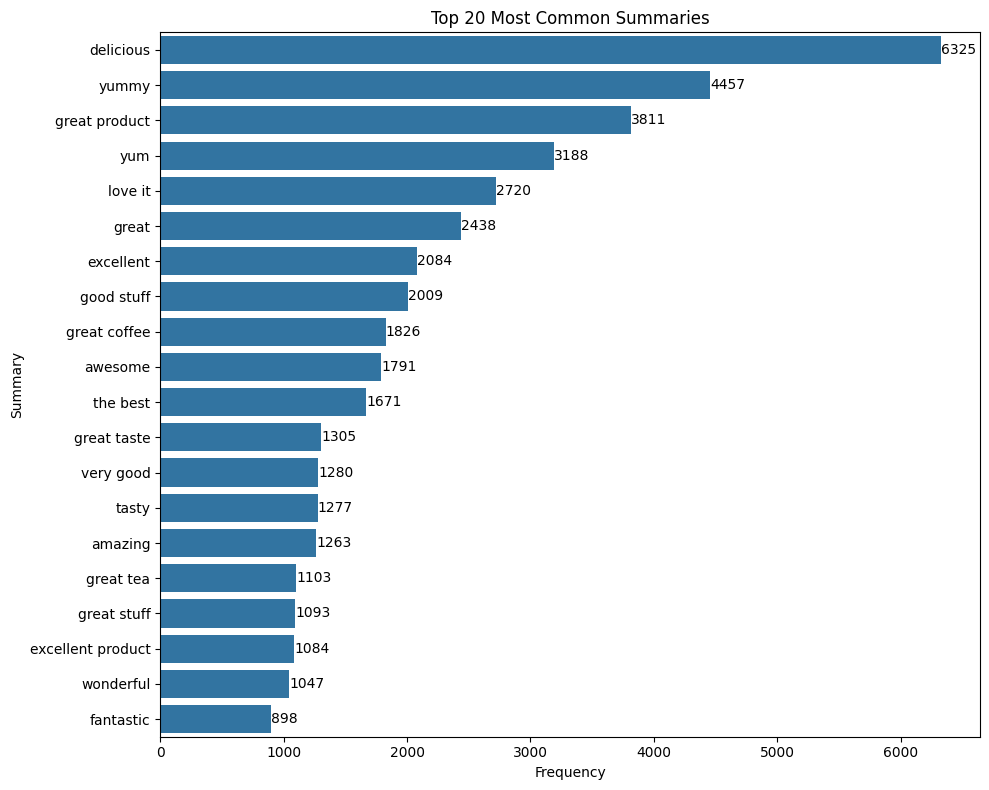

In [22]:
# Count the frequency of each unique summary in 'Summary'
summary_counts = df['Summary'].value_counts().head(20)

# Create bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x=summary_counts.values,
    y=summary_counts.index,
    orient='h'
)

# Add count labels to each bar
for i, value in enumerate(summary_counts.values):
    ax.text(value, i, f'{value}', ha='left', va='center', fontsize=10)

# Plot customization
plt.title('Top 20 Most Common Summaries')
plt.xlabel('Frequency')
plt.ylabel('Summary')
plt.tight_layout()
plt.show()


**Observation:**
- The analysis reveals that the most common summaries are overwhelmingly positive, with "delicious," "yummy," and "great product" being the top mentions.
- Customers prefer short, concise expressions to convey satisfaction.
- Terms like "great coffee," "love it," and "excellent" highlight consistent positive feedback.
- The significant frequency of these terms indicates strong customer approval.

#### 3.5 Sentiment Analysis

Sentiment polarity distribution refers to the distribution of sentiment across different categories or levels of positivity, negativity, and neutrality within a given dataset. It provides insights into the overall sentiment of the data and the proportion of positive, negative, and neutral sentiments present.

**Sentiment Polarity:** Sentiment polarity refers to the classification of text as positive, negative, or neutral. It's a core concept in sentiment analysis.

Here in sentiment polarity distribution, we performed the following:
- Calculated Sentiment Polarity: Assigned each text a polarity score based on its sentiment (negative, neutral, or positive).
- Visualized Sentiment Distribution: Display howt text are distributed across sentiment categories (negative, neutral, positive).

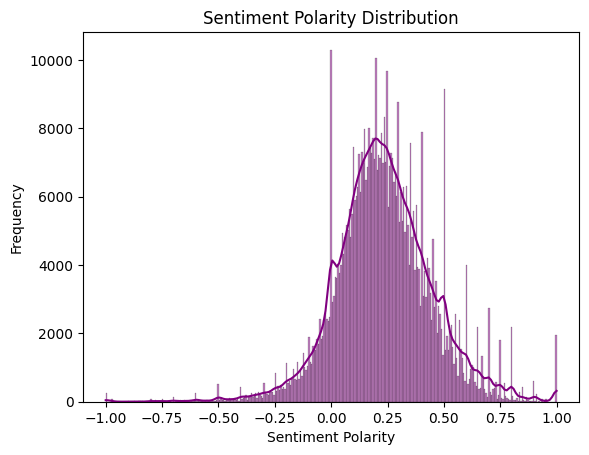

In [23]:

# Plot the sentiment distribution
sns.histplot(df['sentiment'], kde=True, color='purple')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


**Observation:**

- The sentiment polarity distribution shows that most customer reviews have a polarity between 0 and 0.5, indicating a predominance of neutral to mildly positive sentiments.
- The distribution is Right-skewed, with a peak around 0.2 to 0.3, suggesting that positive feedback is more common.
- There are very few reviews with negative sentiment, as indicated by the low frequency of values below 0.
- Overall, the analysis suggests that the majority of  feedback is favorable, while negative sentiments are rare.


# 4. Data Pre-processing for Classification models

#### Vectorization Using TF-IDF:
Text vectorization is a crucial step in Natural Language Processing (NLP) to convert text data into numerical data that machine learning models can process.
- TF-IDF Vectorizer: Converts a collection of raw documents to a matrix of TF-IDF features.

- We will convert our word into integer sequence using vectorization technique.

For example,

L = [ ‘what doing’, ‘how are you’, ’good ’]

- Tokenize all the elements of list ‘L’ and make a dictionary having key as tokens and value as the counter number. So after the data is fit we get a dictionary as

D = { ‘what’ : 1 , ‘doing’ :2 , ‘how’ : 3 , ‘are’ : 4 , ‘you’ :5 , ‘good’ : 6 }

- So we have fit our data, now let’s transform the below list ‘J’ into integer sequence using our tokenizer.

J = [ ‘what are you doing’, ‘you are good’ ]

Transformed (Vectorized) J : [ [ 1 , 4 , 5 , 2 ] , [ 5 , 4 , 6 ] ]

In [24]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the text into numerical features
X = tfidf.fit_transform(df['Text'])

# Target variable
y = df['Sentiment_Label']


### Train-Test Split:

Split the dataset records into training and testing sets. We will be splitting in the 80:20 ratio where 80% record will be for training sets and 20% for testing sets.

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Model Building

- Classification Models:
1. Naive Bayes Model
2. XGBoost Model

- LSTM(Long-Short term memory) Model

#### 5.1. Naive Bayes Model

- Initializes a Multinomial Naive Bayes model.
- Calculates probabilities for each class based on the training data.
- Uses the trained model to predict the labels for the test set (X_test).
- Outputs the predicted class for each test instance.
- The classification report summarizes how well the model performs on the test set.
  
**Metrics Included:**
- Precision: Proportion of correctly predicted positive samples out of all predicted positive samples.
- Recall: Proportion of correctly predicted positive samples out of all actual positive samples.
- F1-Score: Harmonic mean of precision and recall.
- Support: The number of occurrences for each class in y_test.


In [26]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Model Performance:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model Performance:
              precision    recall  f1-score   support

    negative       0.91      0.04      0.08     11647
     neutral       0.75      0.00      0.01      1580
    positive       0.89      1.00      0.94    100258

    accuracy                           0.89    113485
   macro avg       0.85      0.35      0.34    113485
weighted avg       0.89      0.89      0.84    113485



Overall Performance Metrics:
Accuracy: 0.89
The model correctly classified 89% of all instances.(Positive)
The model correctly classified 91% of all instances.(Negative)
The model correctly classified 75% of all instances.(Neutral)
Macro Average:
Precision: 0.85
Recall: 0.35
F1-Score: 0.34
The macro average considers each class equally, showing that the overall performance is dragged down by the poor recall for the negative and neutral classes.
Weighted Average:
Precision: 0.89
Recall: 0.89
F1-Score: 0.84
The weighted average takes into account the number of instances per class, which explains why the metrics are dominated by the positive class (which has the most samples).


#### 5.2. XGBoost Model

- Converts the numerical predictions back into their original categorical labels for easy interpretation.
- Precision: The proportion of correctly predicted positive cases out of all predicted positive cases.
- Recall: The proportion of correctly predicted positive cases out of all actual positive cases.
- F1-score: The harmonic mean of precision and recall.
- Support: The number of actual occurrences for each class.

In [27]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb_decoded))


XGBoost Model Performance:
              precision    recall  f1-score   support

    negative       0.91      0.56      0.70     11647
     neutral       0.90      0.21      0.34      1580
    positive       0.94      0.99      0.97    100258

    accuracy                           0.94    113485
   macro avg       0.92      0.59      0.67    113485
weighted avg       0.94      0.94      0.93    113485



Overall Performance Metrics
Accuracy:
The model correctly classified 94% of all instances.(Positive)
The model correctly classified 91% of all instances.(Negative)
The model correctly classified 90% of all instances.(Neutral)


*   List item
*   List item



- Handles missing data and categorical variables effectively.
- Optimized for speed and performance, making it ideal for large datasets.
- Often achieves state-of-the-art performance in classification tasks.

# LSTM Model

An LSTM with an Attention Mechanism is a type of neural network architecture designed to improve the performance of sequence-to-sequence tasks such as language translation, text summarization, and time series forecasting. Here's an overview of each component and how they integrate:

LSTM (Long Short-Term Memory)
LSTM is a type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data. It overcomes the vanishing gradient problem by using special gating mechanisms (forget gate, input gate, and output gate) to control the flow of information through the network.

Attention Mechanism
The attention mechanism allows the model to focus on different parts of the input sequence while generating each output element. Instead of compressing the entire input sequence into a single fixed-size context vector, the attention mechanism creates dynamic context vectors for each output based on relevant input elements.
Key idea: Weigh different parts of the input sequence differently for each output, improving the model's ability to capture important information.
How LSTM with Attention Works

We are using Stacked LSTM containing 3 layers of LSTM stacked on top of each other. This will make our prediction much better. As per our requirement, we can have more also.


**Input:**
- encoder_inputs: Placeholder for the input text (padded sequences of word indices).
- decoder_inputs: Placeholder for the output sequence (target summary with start tokens).
- Embedding Layers: Maps each word index to a dense vector of fixed size (embedding_dim).
- Encoder: LSTM layer processes the input text and returns:
- encoder_outputs: Sequence of hidden states (for the attention mechanism).
- state_h: The final hidden state (passed to the decoder as context).
- state_c: The final cell state (passed to the decoder as context).
- Decoder: LSTM layer takes the decoder input embeddings and the encoder's final states (state_h, state_c) as initial states.

**Returns:**
- Decoder_outputs: The output sequence generated by the decoder.
- Attention Mechanism: Calculates the alignment between the decoder's outputs and the encoder's outputs.

The result (attention_outputs) is a context vector that focuses on the relevant parts of the input sequence.

- Concatenate Attention Output: Combines the context vector (attention_outputs) with the decoder's output (decoder_outputs) for better predictions.

- Final Dense Layer: Fully connected layer maps the concatenated output to the vocabulary size of the target sequence.

- Model Definition: Combines the encoder, decoder, and attention mechanism into a single sequence-to-sequence model.

- Compilation: Uses adam optimizer and sparse_categorical_crossentropy loss because the output is a sequence of word indices.

### Resampling
Here we can't execute with all rows because of computationon power.
so for that I am taking some rows from positive, negative and neutral to train my model with each scenario.

### Data Sampling:

In [28]:
# Create subsets by sampling
df_new_pos = df[df['Sentiment_Label'] == 'positive'].sample(10000)
df_new_neg = df[df['Sentiment_Label'] == 'negative'].sample(5000)
df_new_neu = df[df['Sentiment_Label'] == 'neutral'].sample(5000)

# Merge all subsets into a single DataFrame
df_merged = pd.concat([df_new_pos, df_new_neg, df_new_neu], ignore_index=True)

# Shuffle the merged DataFrame
df_merged = df_merged.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows
df_merged.head()


product_id         user_id  score  \
0  B00451WLYI   AKGEDEGHA3HNB    5.0   
1  B0025VF8FY  A355L5K5T6ZE2W    5.0   
2  B002C0Z5P6  A28EZPVW4MLLS4    5.0   
3  B000NMJWZO  A237VQH08BM176    5.0   
4  B004CLCEDE  A1E49FSMA5UW34    4.0   

                                             Summary  \
0                     great flavor in no time at all   
1                                   lunch on the run   
2                               essential meal to go   
3  don need to be celiac or gluten intolerant to ...   
4                                            not bad   

                                                Text  sentiment  \
0  got tired of grinding beans in the morning and...  -0.040000   
1  our local stores quit stocking lunch on the ru...   0.410000   
2  always keep one or two pouches in my diaper ba...   0.200000   
3  still eat gluten though everyone in the family...   0.252778   
4  had similar noodles more than year ago they sm...  -0.037500   

  Sentiment_Label  review_length  summary_length  
0        negative             27               7  
1        positive             75               4  
2        positive             34               4  
3        positive            113              11  
4        negative             79               2

In [29]:
df_merged.shape

(20000, 9)

In [30]:
input_data = df_merged['Text']
target_data = df_merged['Summary']
target_data.replace('', np.nan, inplace=True)

##### We will add ‘sos’ to the start and ‘eos’ at the end of target text to tell our model that this is the starting and ending of sentences.



In [31]:
def clean(texts, src):
    words = simple_preprocess(texts, deacc=True, min_len=2)
    words = list(filter(lambda w: (w.isalpha() and len(w) >= 3), words))
    return words

def add_sos_eos(text):
    """Add sos and eos tokens to a given text."""
    return f"sos {text} eos"


After converting to integer sequence we will also make all the input and target texts to the same length for our model. So we will take the length of input sentences which has the highest frequency and store it in the ‘max_in_length’ variable, and repeat the same for target data also. Now we will pad arrays of 0’s to the texts if it is less than the assigned maximum input length.

In [33]:
input_texts = []
target_texts = []
input_words = []
target_words = []

for in_txt, tr_txt in zip(input_data, target_data):
    # Clean and process input text
    in_words = clean(in_txt, "inputs")
    input_texts.append(' '.join(in_words))
    input_words.extend(in_words)

    # Clean and process target text with sos and eos
    trg_words = clean(add_sos_eos(tr_txt), "target")
    target_texts.append(' '.join(trg_words))
    target_words.extend(trg_words)

# Display results
print("Input Texts:", input_texts)
print("Target Texts:", target_texts)


Input Texts: ['got tired grinding beans the morning and discovered this via revelation great tasting coffee instant without the instant coffee flavor disappointment', 'our local stores quit stocking lunch the run could not find locally chance checked amazon and ended buying two cases and the price was real deal what was paying the store drive locally and they are great carry the truck when you not have time stop able park these are great sure glad found them amazon and the service was great', 'always keep one two pouches diaper bag just case would get hungry thirsty very convenient meal for when not have time pack homemade one', 'still eat gluten though everyone the family has some degree gluten sensitivity working moving gluten free the waffles and pancakes made this mix are just good not better than most mixes made with wheat this past weekend made the chocolate chip cookies that are the back the package was not too hopeful was wrong they were great the texture was light and not heav

In [34]:
#store only unique words from input and target list of words
input_words = sorted(list(set(input_words)))
target_words = sorted(list(set(target_words)))
num_in_words = len(input_words) #total number of input words
num_tr_words = len(target_words) #total number of target words


In [35]:
#get the length of the input and target texts which appears most often
max_inp_len = mode([len(i) for i in input_texts])
max_trg_len = mode([len(i) for i in target_texts])

print("number of input words : ",num_in_words)
print("number of target words : ",num_tr_words)
print("maximum input length : ",max_inp_len)
print("maximum target length : ",max_trg_len)


number of input words :  25238
number of target words :  6998
maximum input length :  98
maximum target length :  17


### Tokenization

For Neural networks (like LSTMs ) require numerical input, not raw text.
Tokenization converts words into numerical sequences.

In [38]:
# Split data into 90% train and 10% test
x_train, x_test, y_train, y_test = train_test_split(input_texts, target_texts, test_size=0.1, random_state=0)

in_tokenizer = Tokenizer()
in_tokenizer.fit_on_texts(x_train)
tr_tokenizer = Tokenizer()
tr_tokenizer.fit_on_texts(y_train)

# Convert texts to sequences
x_train = in_tokenizer.texts_to_sequences(x_train)
y_train = tr_tokenizer.texts_to_sequences(y_train)


The text_sequences (input) and summary_sequences (output) can be used to train a sequence-to-sequence model for tasks like summarization, translation, or sentiment generation.

Our encoder input data will be padded ‘x_train’ and decoder input data will be padded ‘y_train’ but we will not include the last word i.e ‘eos’. Decoder target data will be same as decoder input data but it will be one timestep ahead as it will not include the start word i.e. ‘sos’ of our target sentence.

In [39]:
en_in_data = pad_sequences(x_train, maxlen=max_inp_len, padding='post')
dec_data = pad_sequences(y_train, maxlen=max_trg_len, padding='post')

# Create decoder input and target data
dec_in_data = dec_data[:, :-1]
dec_tr_data = dec_data[:, 1:]


#### Define Inputs for layers
- Create placeholders for input text (encoder) and summaries (decoder).
#### Add LSTM Layers
- Define LSTM layers for the encoder and decoder. The encoder outputs both the hidden states and cell states, which will initialize the decoder.

In [40]:
latent_dim = 500

# Encoder inputs and embeddings
en_inputs = Input(shape=(max_inp_len,))
en_embedding = Embedding(num_in_words + 1, latent_dim)(en_inputs)

# 3 stacked LSTM layers
en_lstm1 = LSTM(latent_dim, return_state=True, return_sequences=True)
en_outputs1, state_h1, state_c1 = en_lstm1(en_embedding)

en_lstm2 = LSTM(latent_dim, return_state=True, return_sequences=True)
en_outputs2, state_h2, state_c2 = en_lstm2(en_outputs1)

en_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True)
en_outputs3, state_h3, state_c3 = en_lstm3(en_outputs2)

en_states = [state_h3, state_c3]


#### Add Embedding Layers
- Embed decoder inputs to convert tokens into dense vectors.

In [41]:
# Decoder inputs and embeddings
dec_inputs = Input(shape=(None,))
dec_embedding = Embedding(num_tr_words + 1, latent_dim)(dec_inputs)

# Decoder LSTM
dec_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
dec_outputs, *_ = dec_lstm(dec_embedding, initial_state=en_states)

# Attention layer
attn_out = Attention()([dec_outputs, en_outputs3])

# Combine decoder outputs and attention outputs
from tensorflow.keras.layers import Concatenate, Dense

decoder_combined_context = Concatenate(axis=-1, name="Concat-Layer")([dec_outputs, attn_out])

# Dense output layer
dec_dense = Dense(num_tr_words + 1, activation='softmax', name="Output-Layer")
dec_outputs = dec_dense(decoder_combined_context)


### Model fitting

In [42]:
# Define the model
model = Model([en_inputs, dec_inputs], dec_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    [en_in_data, dec_in_data],
    dec_tr_data,
    batch_size=64,
    epochs=10,
    validation_split=0.1,
)


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 58s 199ms/step - accuracy: 0.7478 - loss: 2.2627 - val_accuracy: 0.7932 - val_loss: 1.5449
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 80s 205ms/step - accuracy: 0.7877 - loss: 1.5275 - val_accuracy: 0.7948 - val_loss: 1.4873
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 83s 210ms/step - accuracy: 0.7906 - loss: 1.4345 - val_accuracy: 0.7981 - val_loss: 1.4518
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - accuracy: 0.7935 - loss: 1.3626 - val_accuracy: 0.8007 - val_loss: 1.4304
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 83s 209ms/step - accuracy: 0.7984 - loss: 1.2771 - val_accuracy: 0.8031 - val_loss: 1.4177
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 53s 208ms/step - accuracy: 0.8013 - loss: 1.2103 - val_accuracy: 0.8055 - val_loss: 1.4077
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 53s 208ms/step - accuracy: 0.8065 - loss: 1.1387 - val_accuracy: 0.8074 - val_loss: 1.4075
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - accuracy: 0.8149 - loss: 1

### Training Metrics
- *Accuracy*:
  - Demonstrated steady improvement from *74.78%* in Epoch 1 to *83.08%* in Epoch 10, reflecting the model's ability to learn patterns in the training data effectively.
- *Loss*:
  - Reduced significantly from *2.2627* to *0.9202*, indicating effective optimization and decreasing error during training.

### Validation Metrics
- *Accuracy*:
  - Increased from *79.32%* in Epoch 1 to *80.87%* in Epoch 10, showcasing the model's ability to generalize to unseen data.
- *Loss*:
  - Declined from *1.5449* to *1.4306*, signaling improved performance on validation data, although the rate of improvement plateaued in later epochs.

### Observations
- The consistent improvement in training and validation accuracy indicates the model is learning effectively while maintaining generalization.
- The slight gap between training and validation accuracy is expected and suggests no significant overfitting.
- Validation loss plateauing in the final epochs hints that the model might have reached convergence; further tuning or regularization could optimize performance further.

In [43]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 98)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 98, 500)        │     12,619,500 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 98, 500),      │      2,002,000 │ embedding[0][0]        │
│                           │ (None, 500), (None,    │                │                        │
│                           │ 500)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 98, 500),      │      2,002,000 │ lstm[0][0]             │
│                           │ (None, 500), (None,    │                │                        │
│                           │ 500)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 500)      │      3,499,500 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ [(None, 98, 500),      │      2,002,000 │ lstm_1[0][0]           │
│                           │ (None, 500), (None,    │                │                        │
│                           │ 500)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ [(None, None, 500),    │      2,002,000 │ embedding_1[0][0],     │
│                           │ (None, 500), (None,    │                │ lstm_2[0][1],          │
│                           │ 500)]                  │                │ lstm_2[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, None, 500)      │              0 │ lstm_3[0][0],          │
│                           │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Concat-Layer              │ (None, None, 1000)     │              0 │ lstm_3[0][0],          │
│ (Concatenate)             │                        │                │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Output-Layer (Dense)      │ (None, None, 6999)     │      7,005,999 │ Concat-Layer[0][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 93,398,999 (356.29 MB)

 Trainable params: 31,132,999 (118.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,266,000 (237.53 MB)

#### Connect with drive

In [44]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [45]:
#Save model
model.save("/content/drive/MyDrive/summarizer.keras")


This Model () anyone can use for summerizing long review into shorter one.

In [51]:

# Load the trained model
model = load_model("/content/drive/MyDrive/summarizer.keras")

# Define latent dimension (should match the training configuration)
latent_dim = 500

# Encoder inference model
# Assuming the last LSTM layer is the 6th layer in the model
en_outputs, state_h_enc, state_c_enc = model.layers[6].output
en_states = [state_h_enc, state_c_enc]

# Define the encoder model
en_model = Model(model.input[0], [en_outputs] + en_states)

# Decoder inference model
# Inputs for decoder's hidden states and cell states
dec_state_input_h = Input(shape=(latent_dim,))
dec_state_input_c = Input(shape=(latent_dim,))
dec_hidden_state_input = Input(shape=(max_inp_len, latent_dim))

# Get the decoder input and embedding layer from the model
dec_inputs = model.input[1]
dec_emb_layer = model.layers[5]
dec_lstm = model.layers[7]

# Apply the embedding layer to the decoder input
dec_embedding = dec_emb_layer(dec_inputs)

# LSTM layer initialized with encoder's hidden and cell states
dec_outputs2, state_h2, state_c2 = dec_lstm(dec_embedding, initial_state=[dec_state_input_h, dec_state_input_c])

# Attention layer
attention = model.layers[8]
attn_out2 = attention([dec_outputs2, dec_hidden_state_input])

# Concatenate the LSTM outputs and attention outputs
merge2 = Concatenate(axis=-1)([dec_outputs2, attn_out2])

# Dense (output) layer
dec_dense = model.layers[10]
dec_outputs2 = dec_dense(merge2)

# Define the decoder model
dec_model = Model(
    [dec_inputs] + [dec_hidden_state_input, dec_state_input_h, dec_state_input_c],
    [dec_outputs2] + [state_h2, state_c2]
)

# Create dictionaries for word-to-index and index-to-word
reverse_target_word_index = tr_tokenizer.index_word
reverse_source_word_index = in_tokenizer.index_word
target_word_index = tr_tokenizer.word_index

# Add an empty string for the index 0
reverse_target_word_index[0] = ' '

# Function to decode the sequence
def decode_sequence(input_seq):
    # Get the encoder output and states by passing the input sequence
    en_out, en_h, en_c = en_model.predict(input_seq)

    # Start the target sequence with the 'sos' token
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_word_index['sos']

    # Initialize the decoded sentence
    stop_condition = False
    decoded_sentence = ""

    while not stop_condition:
        # Predict output words and the next states
        output_words, dec_h, dec_c = dec_model.predict([target_seq] + [en_out, en_h, en_c])

        # Get the index of the word with the highest probability
        word_index = np.argmax(output_words[0, -1, :])
        text_word = reverse_target_word_index[word_index]
        decoded_sentence += text_word + " "

        # Exit condition: Stop when 'eos' is predicted or the max length is reached
        if text_word == "eos" or len(decoded_sentence) > max_trg_len:
            stop_condition = True

        # Update the target sequence with the current word index
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = word_index
        en_h, en_c = dec_h, dec_c

    return decoded_sentence.strip()

# Function to clean input text (assuming a cleaning function is defined)
def clean(text, mode="inputs"):
    # Example cleaning function: lowercasing and removing special characters
    import re
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.split()


Now we will test our model by giving positive and negative both reviews.

In [59]:
# Input from the user
inp_review = input("Enter: ")
print("Review:", inp_review)

# Clean and preprocess the input
inp_review = clean(inp_review, "inputs")
inp_review = ' '.join(inp_review)
inp_x = in_tokenizer.texts_to_sequences([inp_review])
inp_x = pad_sequences(inp_x, maxlen=max_inp_len, padding='post')

# Generate the summary
summary = decode_sequence(inp_x.reshape(1, max_inp_len))
if 'eos' in summary:
    summary = summary.replace('eos', '')
print("\nPredicted summary:", summary)

Enter: Barely charges my phone and overheats quickly. Stopped working after a week. Total waste!
Review: Barely charges my phone and overheats quickly. Stopped working after a week. Total waste!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Predicted summary: not metallic 


In [61]:
# Input from the user
inp_review = input("Enter: ")
print("Review:", inp_review)

# Clean and preprocess the input
inp_review = clean(inp_review, "inputs")
inp_review = ' '.join(inp_review)
inp_x = in_tokenizer.texts_to_sequences([inp_review])
inp_x = pad_sequences(inp_x, maxlen=max_inp_len, padding='post')

# Generate the summary
summary = decode_sequence(inp_x.reshape(1, max_inp_len))
if 'eos' in summary:
    summary = summary.replace('eos', '')
print("\nPredicted summary:", summary)


Enter: I was absolutely blown away by this portable speaker! The sound quality is crystal clear, with surprisingly deep bass for such a compact device. It's super easy to connect via Bluetooth, and the battery life is outstanding.
Review: I was absolutely blown away by this portable speaker! The sound quality is crystal clear, with surprisingly deep bass for such a compact device. It's super easy to connect via Bluetooth, and the battery life is outstanding.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Predicted summary: good 


#### Model Selection:

XGBoost for Classification: XGBoost is the better-performing model because:
Higher Accuracy: 94% vs. 89% for Naive Bayes.
Better Class Balance: Achieves significantly better recall and F1-scores for negative and neutral classes.

LSTM with Attention Layer : It gives the correct summary of long reviews in short words with accuracy of 84.3%.
The LSTM with Attention Mechanism provides a scalable, resource-efficient, and customizable solution for automated text summarization of customer reviews.


### Challenge

Faced computational challenge while building LSTM model thats we took only some rows.




### References :
1. *Libraries*:  
   - *Pandas*: [Documentation](https://pandas.pydata.org/)  
   - *Seaborn*: [Documentation](https://seaborn.pydata.org/)  
   - *Matplotlib*: [Documentation](https://matplotlib.org/stable/index.html)  
   - *NumPy*: [Documentation](https://numpy.org/)  
   - *TextBlob*: [Documentation](https://textblob.readthedocs.io/en/dev/)  
   - *WordCloud*: [Documentation](https://github.com/amueller/word_cloud)  

2. *Machine Learning Models*:  
   - *Scikit-Learn*: Naive Bayes, TF-IDF, LabelEncoder. [Documentation](https://scikit-learn.org/)  
   - *XGBoost*: [Documentation](https://xgboost.readthedocs.io/en/stable/)  

3. *Deep Learning Frameworks*:  
   - *Keras*: [Documentation](https://keras.io/)  
   - *TensorFlow*: [Documentation](https://www.tensorflow.org/)  

4. *Medium Articles on LSTM*:  
   - [An Intuitive Guide to LSTM Networks](https://towardsdatascience.com/an-intuitive-guide-to-lstm-networks-5c2910da8ce8)  
   - [How LSTM Networks Work](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)  
   - [Abstractive Text Summarization Using LSTM](https://medium.com/swlh/abstractive-text-summarization-using-lstm-869379e6210)  
   - [Introduction to LSTM for Sequence Modeling](https://towardsdatascience.com/lstm-and-its-friend-attention-8bf32f501d4d)  
   - [Implementing LSTM with Keras](https://medium.com/@curiousily/text-classification-with-lstm-and-tensorflow-2-0-4dcd345980e3)  

5. *Other NLP Techniques*:  
   - [TF-IDF in Natural Language Processing](https://towardsdatascience.com/tf-idf-in-natural-language-processing-8bd9d6b022d3)  
   - [Naive Bayes Classifier Explained](https://medium.com/swlh/naive-bayes-classifier-explained-24da5d91e16e)  
   - [Creating a Word Cloud Using Python](https://medium.com/analytics-vidhya/creating-a-word-cloud-using-python-5a3a8f52dc4d)